#### Requirements

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('C:/Users/SWETHA/OneDrive/Documents/Folder/New Volume F/New folder F/1. Assignment/Project_pro', format=fig_extension, dpi=resolution)

In [ ]:
! pip install shap

In [ ]:
!pip install category_encoders

#### Library

In [ ]:
!pip install sweetviz

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sweetviz as sv
import xgboost
from xgboost import XGBRegressor


#### Get the Data

In [ ]:
train = pd.read_csv("/content/train-2.csv")

#### Data Types

In [ ]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'datetime64',
    'Arrival_Time': 'datetime64',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64',
    'Flight_Price': 'float64'
}

# Apply data types to DataFrame columns
train = train.astype(data_types)

# Print the data types of the DataFrame columns
print(train.dtypes)

Flight_ID                     object
Airline                     category
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type               category
Number_of_Stops                int64
Day_of_Week                 category
Month_of_Travel             category
Holiday_Season              category
Demand                      category
Weather_Conditions          category
Passenger_Count                int64
Promotion_Type              category
Fuel_Price                   float64
Flight_Price                 float64
dtype: object


#### Take a Quick Look at the Data Structure

In [ ]:
train.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,2023-11-29 08:23:00,2023-11-29 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-29 20:28:00,2023-11-29 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-29 11:30:00,2023-11-29 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,2023-11-29 20:24:00,2023-11-29 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-29 21:59:00,2023-11-29 06:04:00,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           45000 non-null  object        
 1   Airline             41427 non-null  category      
 2   Departure_City      44660 non-null  object        
 3   Arrival_City        44814 non-null  object        
 4   Distance            44909 non-null  float64       
 5   Departure_Time      45000 non-null  datetime64[ns]
 6   Arrival_Time        45000 non-null  datetime64[ns]
 7   Duration            45000 non-null  float64       
 8   Aircraft_Type       44957 non-null  category      
 9   Number_of_Stops     45000 non-null  int64         
 10  Day_of_Week         44775 non-null  category      
 11  Month_of_Travel     44733 non-null  category      
 12  Holiday_Season      45000 non-null  category      
 13  Demand              44683 non-null  category  

In [ ]:
data = train.copy() # Copied data from the train

In [ ]:
data.shape

(45000, 19)

In [ ]:
# check for all the columns present
column_names = np.array(data.columns)
print(column_names)

['Flight_ID' 'Airline' 'Departure_City' 'Arrival_City' 'Distance'
 'Departure_Time' 'Arrival_Time' 'Duration' 'Aircraft_Type'
 'Number_of_Stops' 'Day_of_Week' 'Month_of_Travel' 'Holiday_Season'
 'Demand' 'Weather_Conditions' 'Passenger_Count' 'Promotion_Type'
 'Fuel_Price' 'Flight_Price']


#### EDA

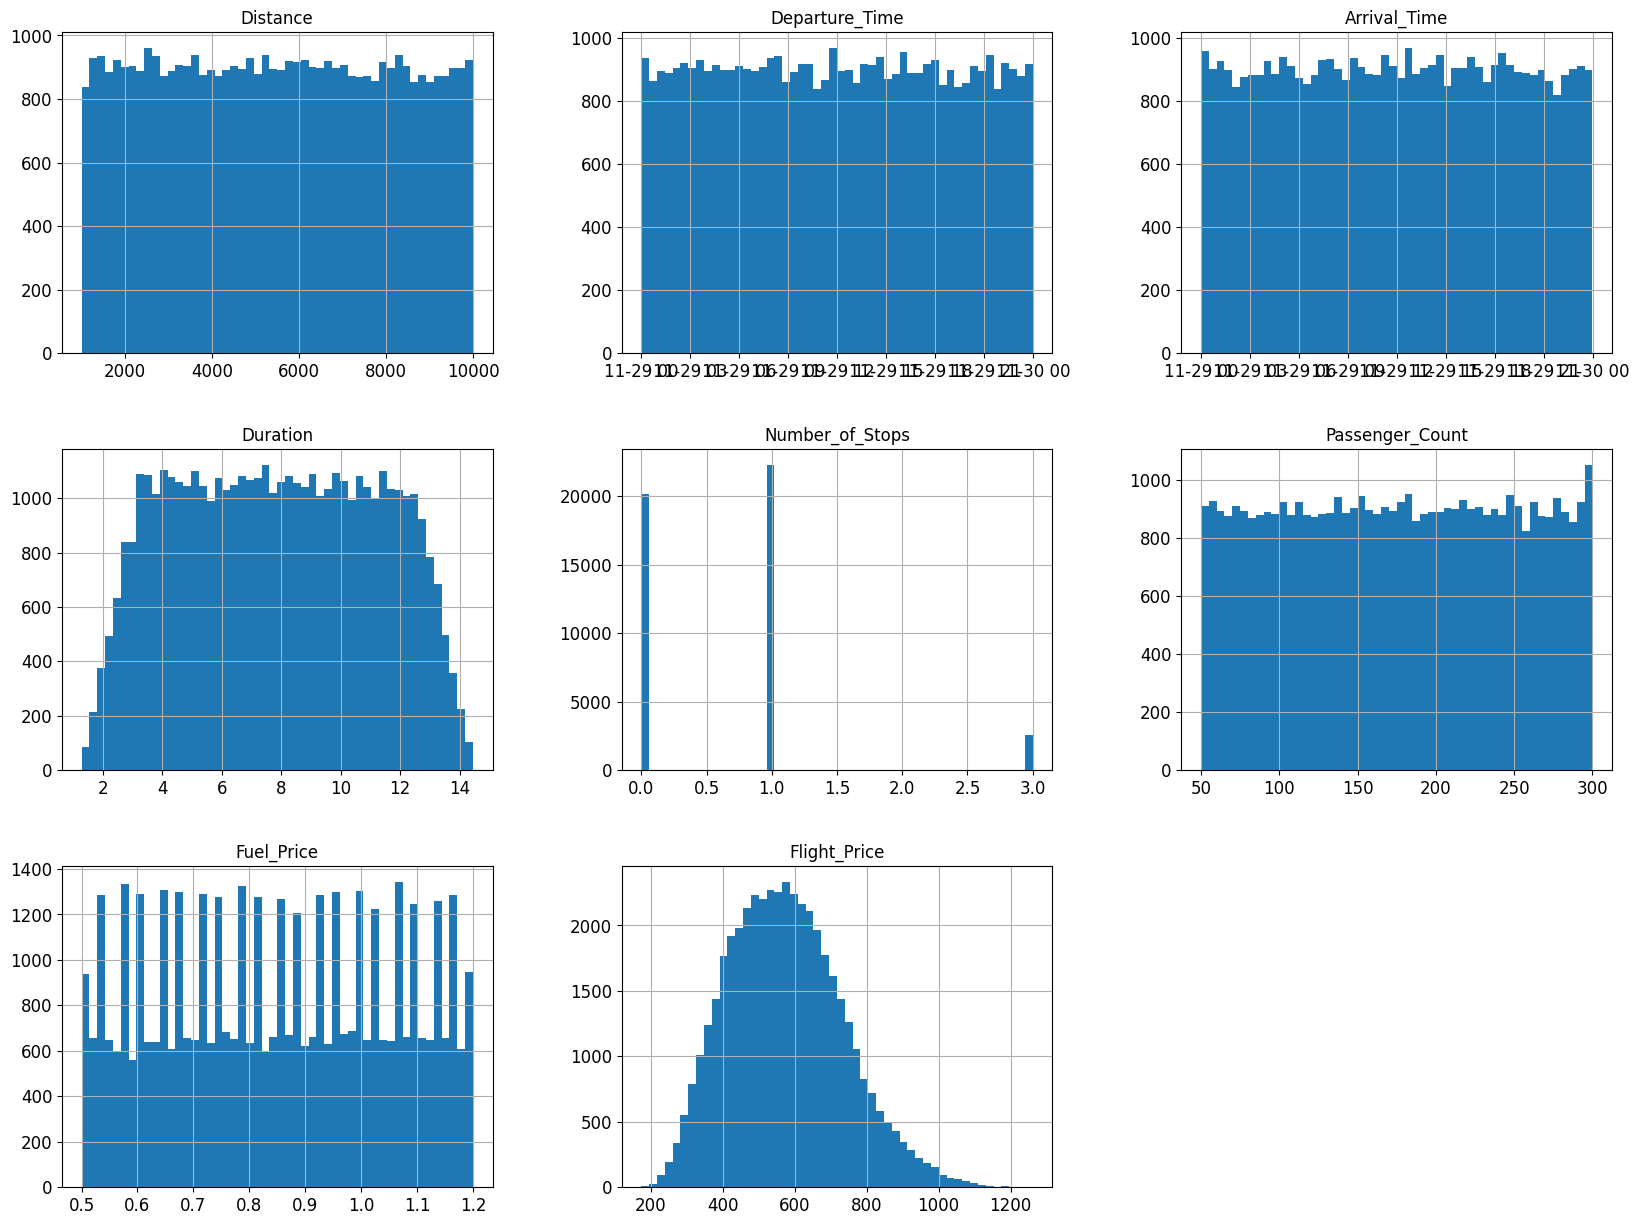

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Airline,7.940000
Promotion_Type,0.895556
Departure_City,0.755556
Demand,0.704444
Weather_Conditions,0.671111
Month_of_Travel,0.593333
Day_of_Week,0.500000
Arrival_City,0.413333
Distance,0.202222
Fuel_Price,0.200000


In [ ]:
data.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [ ]:
describe_result = data.describe(percentiles=[.25, .5, .75, .95, 0.99, 1])

describe_result

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
95%,9554.600000,13.000000,3.000000,288.000000,1.160000,857.502500
99%,9909.000000,13.810000,3.000000,298.000000,1.190000,989.130000
100%,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


#### Create Train and Validation dataset

In [ ]:
flight_price_ranges = [0., 455, 565, 679, 1267, np.inf]
flight_price_labels = [1, 2, 3, 4, 5]

data["Flight_Price_Bin"] = pd.cut(data["Flight_Price"],
                                  bins=flight_price_ranges,
                                  labels=flight_price_labels)

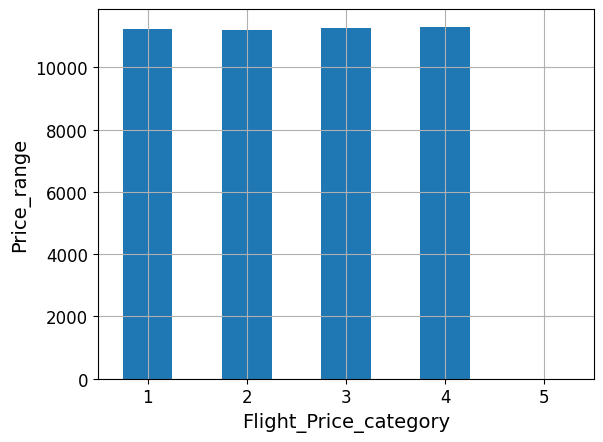

In [ ]:
data["Flight_Price_Bin"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Flight_Price_category")
plt.ylabel("Price_range")
plt.show()

In [ ]:
#strat_train_set, strat_test_set = train_test_split(
#    data, test_size=0.2, stratify=data["Flight_Price_Bin"], random_state=42)

In [ ]:
#strat_test_set["Flight_Price_Bin"].value_counts() / len(strat_test_set)

Corelation

In [ ]:
#corr_matrix = strat_train_set.corr()

In [ ]:
#corr_matrix["Flight_Price"].sort_values(ascending=False)

#### Data Vizualization

###### Sweet_Viz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Bar vs Line Graphs

#### Feature Engineering

In [ ]:
#Pricing["Flight_Cost"] = Pricing["Fuel_Price"] * Pricing["Distance"]
#Pricing["Flight_Income"] = Pricing["Passenger_Count"] * Pricing["Flight_Price"]
#Pricing["Flight_Profit"] = Pricing["Flight_Income"] - Pricing["Flight_Cost"]

## Price per hour
## Price per mail


In [ ]:
#corr_matrix = Pricing.corr()
#corr_matrix["Flight_Price"].sort_values(ascending=False)

In [ ]:
#Pricing.head()

#### Prepare the Data for Machine Learning Algorithms

In [ ]:
Pricing = data.copy()
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           45000 non-null  object        
 1   Airline             41427 non-null  category      
 2   Departure_City      44660 non-null  object        
 3   Arrival_City        44814 non-null  object        
 4   Distance            44909 non-null  float64       
 5   Departure_Time      45000 non-null  datetime64[ns]
 6   Arrival_Time        45000 non-null  datetime64[ns]
 7   Duration            45000 non-null  float64       
 8   Aircraft_Type       44957 non-null  category      
 9   Number_of_Stops     45000 non-null  int64         
 10  Day_of_Week         44775 non-null  category      
 11  Month_of_Travel     44733 non-null  category      
 12  Holiday_Season      45000 non-null  category      
 13  Demand              44683 non-null  category  

#### Data Cleaning

In [ ]:
Pricing.dropna(inplace = True)

In [ ]:
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39354 entries, 1 to 44999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           39354 non-null  object        
 1   Airline             39354 non-null  category      
 2   Departure_City      39354 non-null  object        
 3   Arrival_City        39354 non-null  object        
 4   Distance            39354 non-null  float64       
 5   Departure_Time      39354 non-null  datetime64[ns]
 6   Arrival_Time        39354 non-null  datetime64[ns]
 7   Duration            39354 non-null  float64       
 8   Aircraft_Type       39354 non-null  category      
 9   Number_of_Stops     39354 non-null  int64         
 10  Day_of_Week         39354 non-null  category      
 11  Month_of_Travel     39354 non-null  category      
 12  Holiday_Season      39354 non-null  category      
 13  Demand              39354 non-null  category  

#### Encoding and Feature Scaling

##### Success Method

In [ ]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    Pricing[col] = label_encoder.fit_transform(Pricing[col])

Pricing.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-29 20:28:00,2023-11-29 01:45:00,5.29,Airbus A320,0,6,7,2,1,Rain,107,1,1.08,423.13,1
6,F7,Airline B,West Samanthaland,Port Brentport,3274.0,2023-11-29 16:21:00,2023-11-29 21:57:00,5.60,Boeing 787,0,6,4,2,1,Clear,248,2,1.03,429.53,1
9,F10,Airline B,Suechester,Clintonhaven,8677.0,2023-11-29 05:32:00,2023-11-29 17:01:00,11.49,Airbus A380,0,0,5,3,1,Snow,236,2,0.80,652.88,3
10,F11,Airline A,Larsenchester,Kathyside,2275.0,2023-11-29 17:26:00,2023-11-29 20:58:00,3.54,Airbus A320,0,1,1,4,2,Cloudy,295,2,1.11,550.52,2
12,F13,Airline C,Richardsonton,Maryview,9363.0,2023-11-29 21:22:00,2023-11-29 09:24:00,12.04,Airbus A320,1,4,0,4,2,Cloudy,243,2,1.02,825.53,4


In [ ]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
Pricing = pd.get_dummies(Pricing, columns=categorical_cols, drop_first=True)


In [ ]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
Pricing = looe_encoder.fit_transform(Pricing, Pricing['Flight_Price'])

In [ ]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
Pricing[numeric_cols] = scaler.fit_transform(Pricing[numeric_cols])


In [ ]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
Pricing.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
Pricing.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,574.848191,585.515000,-0.981189,5.29,-0.886885,6,7,2,1,-0.939577,...,1,0,1,0,0,0,0,0,1,0
6,574.848191,333.200000,-0.853155,5.60,-0.886885,6,4,2,1,1.008050,...,1,1,0,0,0,0,1,0,0,0
9,574.848191,574.848191,1.230481,11.49,-0.886885,0,5,3,1,0.842295,...,3,1,0,1,0,0,0,0,0,1
10,574.848191,574.848191,-1.238413,3.54,-0.886885,1,1,4,2,1.657259,...,2,0,0,0,0,0,0,1,0,0
12,446.510000,574.292500,1.495033,12.04,0.442480,4,0,4,2,0.938986,...,4,0,1,0,0,0,0,1,0,0


In [ ]:
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39354 entries, 1 to 44999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Departure_City             39354 non-null  float64 
 1   Arrival_City               39354 non-null  float64 
 2   Distance                   39354 non-null  float64 
 3   Duration                   39354 non-null  float64 
 4   Number_of_Stops            39354 non-null  float64 
 5   Day_of_Week                39354 non-null  int64   
 6   Month_of_Travel            39354 non-null  int64   
 7   Holiday_Season             39354 non-null  int64   
 8   Demand                     39354 non-null  int64   
 9   Passenger_Count            39354 non-null  float64 
 10  Promotion_Type             39354 non-null  int64   
 11  Fuel_Price                 39354 non-null  float64 
 12  Flight_Price               39354 non-null  float64 
 13  Flight_Price_Bin           3935

#### Select Train and Test Model

In [ ]:
Pricing.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,574.848191,585.515000,-0.981189,5.29,-0.886885,6,7,2,1,-0.939577,...,1,0,1,0,0,0,0,0,1,0
6,574.848191,333.200000,-0.853155,5.60,-0.886885,6,4,2,1,1.008050,...,1,1,0,0,0,0,1,0,0,0
9,574.848191,574.848191,1.230481,11.49,-0.886885,0,5,3,1,0.842295,...,3,1,0,1,0,0,0,0,0,1
10,574.848191,574.848191,-1.238413,3.54,-0.886885,1,1,4,2,1.657259,...,2,0,0,0,0,0,0,1,0,0
12,446.510000,574.292500,1.495033,12.04,0.442480,4,0,4,2,0.938986,...,4,0,1,0,0,0,0,1,0,0


In [ ]:
strat_train_set, strat_test_set = train_test_split(Pricing, test_size=0.1, stratify=Pricing["Flight_Price_Bin"], random_state=42)

In [ ]:
columns_to_drop = ['Flight_Price', 'Flight_Price_Bin']

X_train=strat_train_set.drop(columns=columns_to_drop)
y_train=strat_train_set['Flight_Price']

X_test=strat_test_set.drop(columns=columns_to_drop)
y_test=strat_test_set['Flight_Price']

#### XG Boost

Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [ ]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,       # Try a higher max_depth
    'learning_rate': 0.05, # Try a smaller learning rate
    'n_estimators': 42,  # Increase the number of boosting rounds
    'objective': 'reg:squarederror',
    'lambda': 0.1,        # Experiment with the lambda value
    'alpha': 0.1,        # Experiment with the alpha value
    'subsample': 0.6,      # Adjust the subsample value
    'colsample_bytree': 0.6,# Adjust the colsample_bytree value
    'booster':'gbtree',
    'tree_method':'exact'

}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,  # You can adjust the number of boosting rounds
    nfold=14,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=8,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(dtest)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)


[06:37:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[06:37:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[06:37:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[06:39:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



Root Mean Squared Error (RMSE): 11.159634445870113


#### Evaluate Your System on the Test Set

Prepare Test data

In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'datetime64',
    'Arrival_Time': 'datetime64',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64'
}

# Apply data types to DataFrame columns
test = test.astype(data_types)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           5000 non-null   object        
 1   Airline             4573 non-null   category      
 2   Departure_City      4961 non-null   object        
 3   Arrival_City        4970 non-null   object        
 4   Distance            4991 non-null   float64       
 5   Departure_Time      5000 non-null   datetime64[ns]
 6   Arrival_Time        5000 non-null   datetime64[ns]
 7   Duration            5000 non-null   float64       
 8   Aircraft_Type       4992 non-null   category      
 9   Number_of_Stops     5000 non-null   int64         
 10  Day_of_Week         4975 non-null   category      
 11  Month_of_Travel     4966 non-null   category      
 12  Holiday_Season      5000 non-null   category      
 13  Demand              4966 non-null   category    

In [ ]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
test = looe_encoder.fit_transform(test, test['Distance'])

In [ ]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    test[col] = label_encoder.fit_transform(test[col])


In [ ]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

In [ ]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])

In [ ]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.673212,-0.904088,5.52,0.448898,2,1,3,2,-0.890900,...,0.485562,1,0,0,1,0,0,0,0,0
1,5460.673212,5460.673212,1.261435,11.80,0.448898,4,0,1,0,1.647034,...,0.977653,0,0,1,0,0,0,0,0,0
2,5460.673212,5460.673212,0.345752,9.59,0.448898,3,4,1,1,0.659297,...,-1.089127,0,1,0,0,1,0,0,1,0
3,5460.673212,5460.673212,0.908161,10.21,-0.901578,4,7,1,1,0.659297,...,0.141099,0,0,1,0,0,0,0,1,0
4,5460.673212,5460.673212,-1.656133,1.86,0.448898,2,1,3,0,-0.410750,...,1.272907,1,0,0,0,0,0,1,0,0


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [ ]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)



In [ ]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [ ]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [ ]:
y_pred1

array([626.67, 909.31, 559.87, ..., 346.8 , 751.87, 531.83])

In [ ]:
submission = pd.read_csv("/content/Submission.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [ ]:
Predicted_flight_price.to_csv('/content/Submission.csv', index = False)